In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/config/workspace/notebooks/gemstone.csv")

In [3]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
10177,10177,0.24,Ideal,G,VS2,61.2,57.0,4.01,4.05,2.47,559
10178,10178,1.21,Premium,F,SI2,62.7,58.0,6.79,6.74,4.24,5483
10179,10179,0.72,Ideal,D,VS2,60.9,57.0,5.76,5.80,3.53,3353
10180,10180,0.31,Ideal,H,VS1,61.8,57.0,4.34,4.37,2.69,559


In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
#No missing value in the data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10182 entries, 0 to 10181
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10182 non-null  int64  
 1   carat    10182 non-null  float64
 2   cut      10182 non-null  object 
 3   color    10182 non-null  object 
 4   clarity  10182 non-null  object 
 5   depth    10182 non-null  float64
 6   table    10182 non-null  float64
 7   x        10182 non-null  float64
 8   y        10182 non-null  float64
 9   z        10182 non-null  float64
 10  price    10182 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 875.1+ KB


In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
#LETS DROP ID because it is unique value
df=df.drop(labels=["id"],axis=1)

In [6]:
#Check for duplicated records
df.duplicated().sum()

0

In [8]:
##segregrate numercial and categorical

numercial_columns= df.columns[df.dtypes!='object']
categorical_columns= df.columns[df.dtypes=='object']

In [9]:
numercial_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [10]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [11]:
df[categorical_columns].describe()

,cut,color,clarity
count,10182,10182,10182
unique,5,7,8
top,Ideal,G,SI1
freq,4885,2374,2760


In [12]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [19]:
df["cut"].value_counts()

cut
Ideal        4885
Premium      2638
Very Good    1960
Good          587
Fair          112
Name: count, dtype: int64

In [13]:
df["color"].value_counts()

color
G    2374
E    1853
F    1755
H    1638
D    1333
I     915
J     314
Name: count, dtype: int64

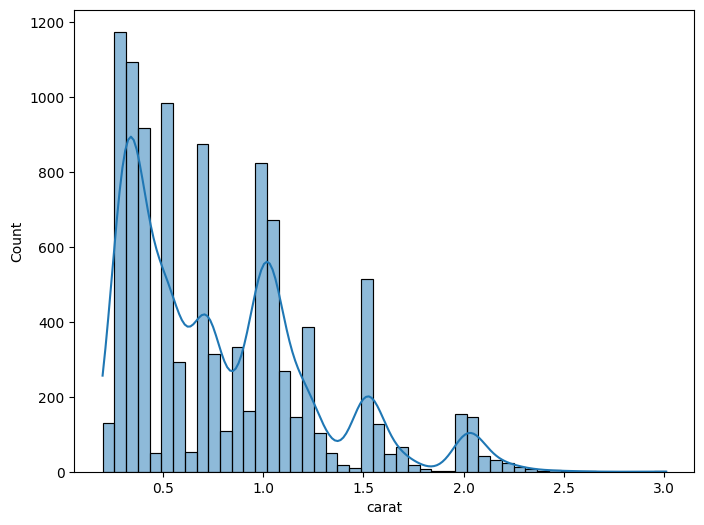

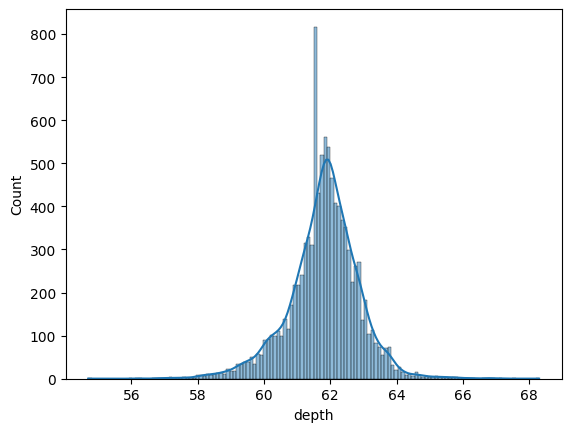

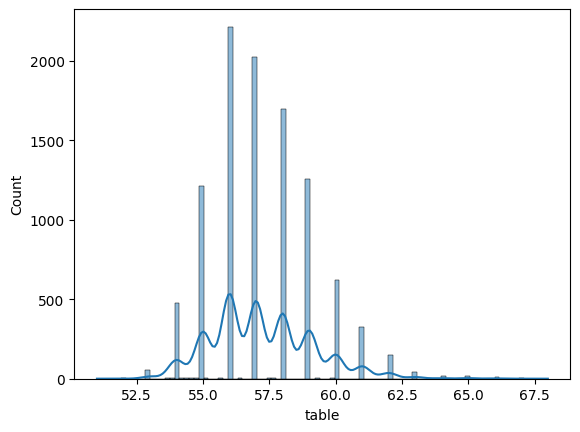

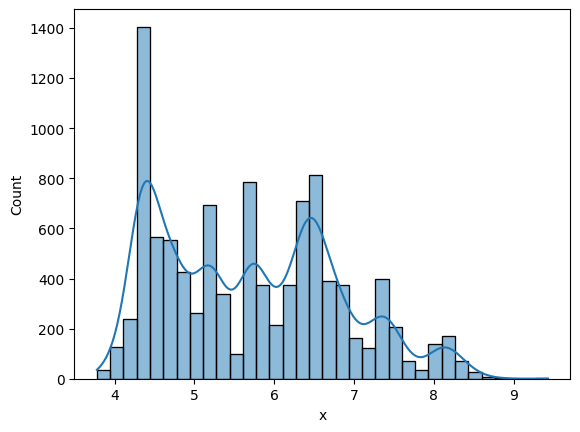

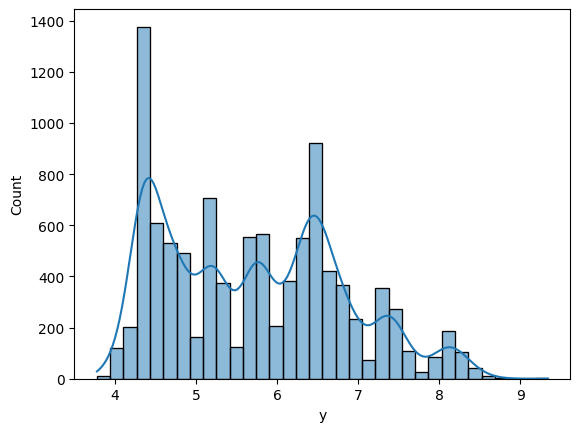

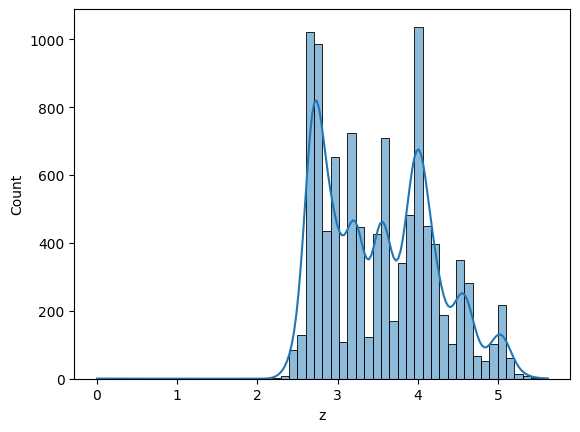

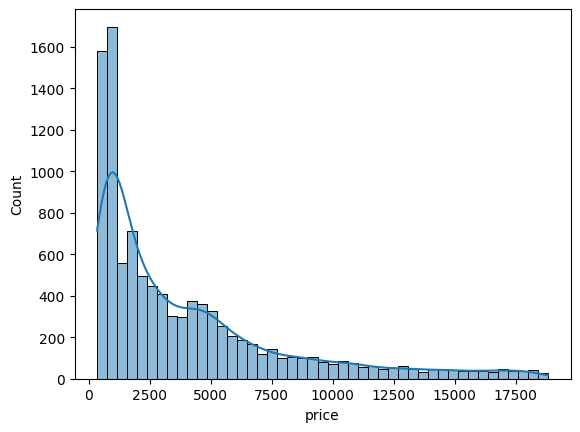

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numercial_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [23]:
#sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [18]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [19]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [20]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
